In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
import pickle

In [2]:
X=pd.read_csv('x_data.csv')

In [3]:
y=pd.read_csv('y_data.csv')
y=y.astype("int")

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X, y)
sel.get_support()
selected_feat= X.columns[(sel.get_support())]
print(selected_feat)

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'doornumber', 'mpg', 'carbody_sedan'],
      dtype='object')


In [5]:
X=X[selected_feat]
X

,carlength,carwidth,curbweight,enginesize,horsepower,doornumber,mpg,carbody_sedan
0,171.2,65.5,2823,152.0,154,2,22.5,0
1,176.6,66.2,2337,109.0,102,4,27.0,1
2,177.3,66.3,2507,136.0,110,2,22.0,1
3,192.7,71.4,2844,136.0,110,4,22.0,1
4,192.7,71.4,3086,131.0,140,4,18.5,1
...,...,...,...,...,...,...,...,...
159,188.8,67.2,3157,130.0,162,4,19.5,0
160,188.8,68.9,2952,141.0,114,4,25.5,1
161,188.8,68.8,3049,141.0,160,4,22.0,1
162,188.8,68.9,3012,173.0,134,4,20.5,1


In [54]:
for i in X.columns:
    print(i,X[i].min(),X[i].max())

carlength 141.1 208.1
carwidth 60.3 71.7
curbweight 1488 4066
enginesize 61.0 326.0
horsepower 48 262
doornumber 2 4
mpg 15.0 51.5
carbody_sedan 0 1


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scale = sc_X.fit_transform(X_train)
X_test_scale = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train_scale = sc_y.fit_transform(y_train)
y_test_scale = sc_y.transform(y_test)

In [8]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scale, y_train_scale)

LinearRegression()

In [9]:
# Predicting the train set results
y_pred = regressor.predict(X_train_scale)

#### r2_score

In [10]:
from sklearn.metrics import r2_score
r2_score(y_train_scale, y_pred)

0.8415774716388067

#### Mean absolute error 

In [11]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train_scale, y_pred)

0.2908413959542747

#### Mean Square Error (MSE)

In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train_scale, y_pred)

0.15842252836119325

#### Mean absolute percentage error

In [13]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_train_scale, y_pred)

1.669129412490385

#### Root mean square error

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_train_scale, y_pred))

0.3980232761550425

Text(0, 0.5, 'y_pred')

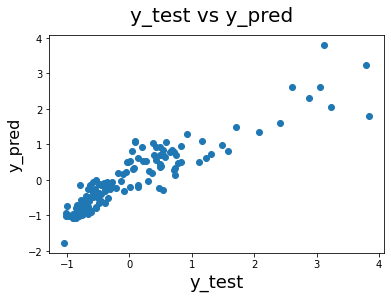

In [15]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train_scale,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

## predicting the test set result

In [16]:
y_pred_test = regressor.predict(X_test_scale)

In [17]:
# Mean absolute error for test set
MAE =mean_absolute_error(y_test_scale, y_pred_test)
# Mean Square Error (MSE) for test set
MSE=mean_squared_error(y_test_scale, y_pred_test)
# Mean absolute percentage error for test set
MAPE=mean_absolute_percentage_error(y_test_scale, y_pred_test)
# Root mean square error for test set
RMSE = sqrt(mean_squared_error(y_test_scale, y_pred_test))
print("Testing Metrics")
print("mean_absolute_error=",MAE)
print("mean_squared_error=",MSE)
print("mean_absolute_percentage_error=",MAPE)
print("rmse=",RMSE)

Testing Metrics
mean_absolute_error= 0.26238967001308694
mean_squared_error= 0.11318831366757107
mean_absolute_percentage_error= 0.5931775451249401
rmse= 0.3364347093680601


Text(0, 0.5, 'y_pred')

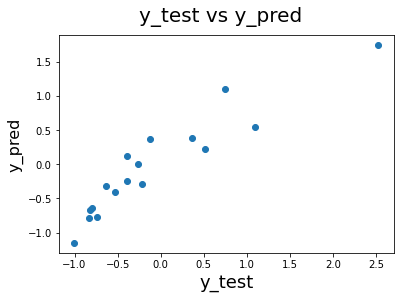

In [18]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_scale,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [19]:
pickle.dump(regressor,open("regressor.pkl","wb"))
pickle.dump(sc_X,open("Scaler_x.pkl","wb"))
pickle.dump(sc_y,open("Scaler_y.pkl","wb"))

### Manual code for flask

In [138]:
y_train.head(2)

,price
107,12764
101,5572


In [139]:
X_train.head(2)

,carlength,carwidth,curbweight,enginesize,horsepower,doornumber,mpg,carbody_sedan
107,173.2,66.3,2818,156.0,145,2,21.5,0
101,157.3,63.8,1918,90.0,68,2,39.0,0


In [140]:
data=X_train.iloc[1].values.reshape(1,-1)
data

array([[ 157.3,   63.8, 1918. ,   90. ,   68. ,    2. ,   39. ,    0. ]])

In [141]:
data=sc_X.transform(data)
data

array([[-1.30162596, -1.00274641, -1.15675207, -0.88809368, -0.91100822,
        -1.22128024,  1.46022205, -1.07785189]])

In [142]:
p=model.predict(data)
p

array([[-0.99270701]])

In [143]:
sc_y.inverse_transform(p)[0][0]

5498.118684268919

In [147]:
a={"A":11,"B":22}
list(a.values())

[11, 22]